In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import warnings
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (13.0, 9.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/limited_data_nextbike_2021-01.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [4]:
warnings.filterwarnings("ignore")

# Distances Analysis

### Inital view of the data

<AxesSubplot:xlabel='distance', ylabel='Density'>

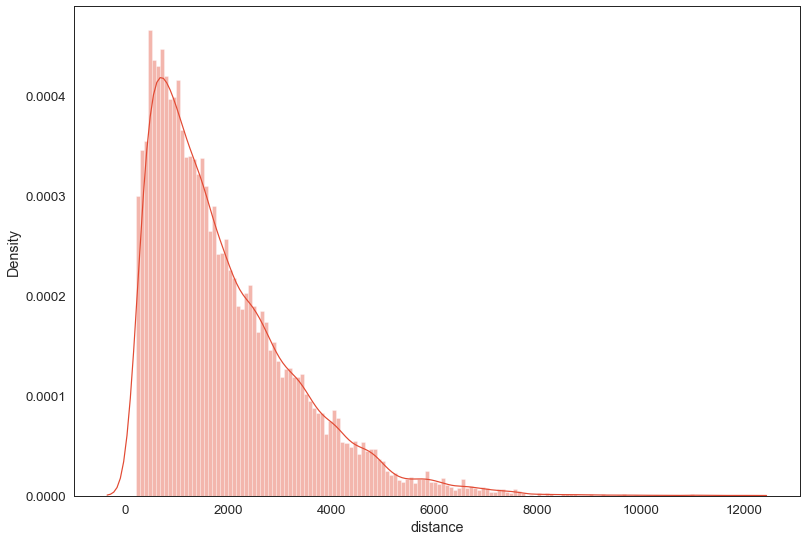

In [5]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [6]:
distance = df["distance"].values

### Fitting continuous + common distributions

,sumsquare_error,aic,bic,kl_div
beta,1.744889e-08,3541.883772,-656719.192044,inf
burr,3.042734e-07,3168.704834,-589498.026275,inf
norm,6.580267e-07,4688.249450,-571380.591186,inf
alpha,6.760252e-07,3184.829348,-570735.977979,inf
bradford,7.310553e-07,2933.781846,-568895.724791,inf


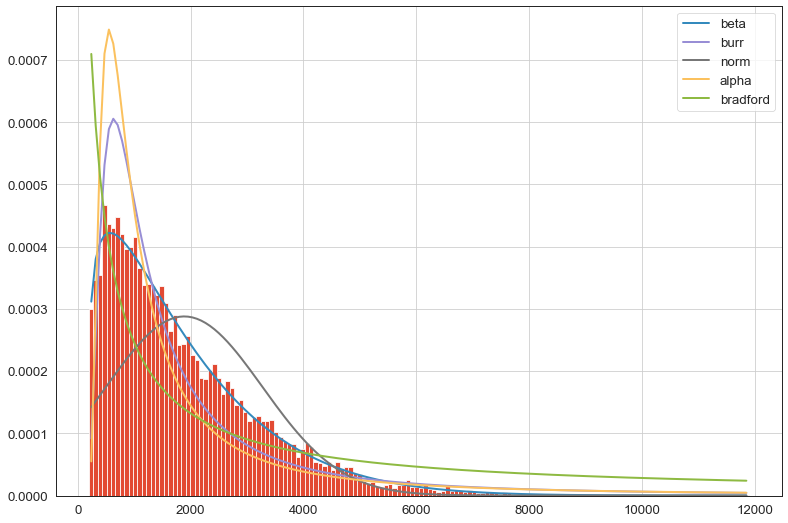

In [7]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
chi,7.913266e-08,3763.812475,-621178.113319,inf
expon,1.943146e-07,3273.058845,-600063.412670,inf
dgamma,5.183722e-07,3799.956364,-576980.076211,inf
cosine,1.887753e-06,3042.979334,-546598.201206,inf
chi2,3.545147e-06,378536.484587,-531769.165793,3.757295


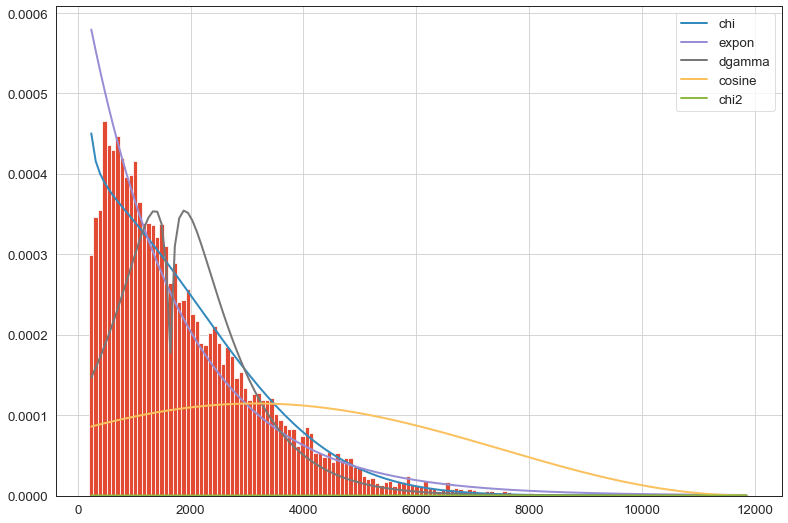

In [8]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
gamma,2.021235e-08,3382.085294,-653272.138874,inf
exponnorm,9.194783e-08,3302.918278,-617648.615698,inf
f,1.390618e-07,3290.343996,-607910.470889,inf
fisk,1.407068e-07,3223.899983,-607643.990199,inf
fatiguelife,1.932946e-06,3388.032786,-546031.821644,inf


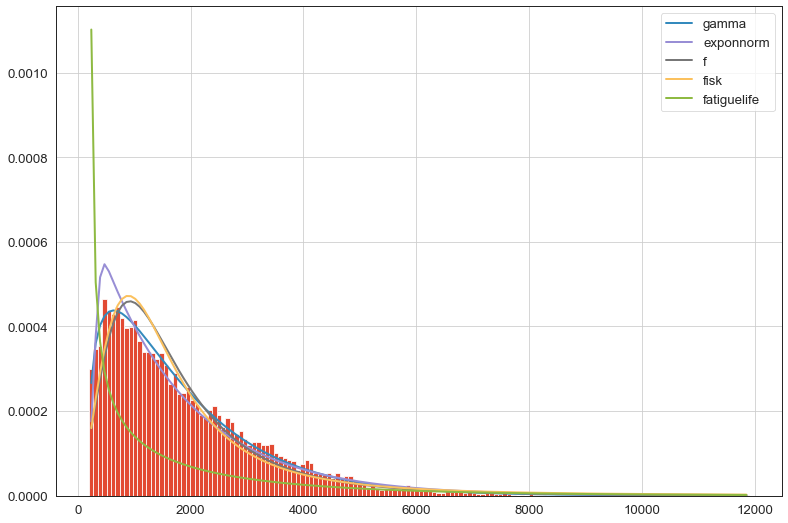

In [9]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
genexpon,1.943171e-07,3279.025682,-600032.918156,inf
gengamma,2.136278e-07,3273.838029,-597815.078613,inf
levy,6.047749e-07,3119.033706,-573365.004353,inf
loggamma,6.553161e-07,4718.396591,-571467.590579,inf
lognorm,4.058557e-06,4119.348658,-528588.811784,inf


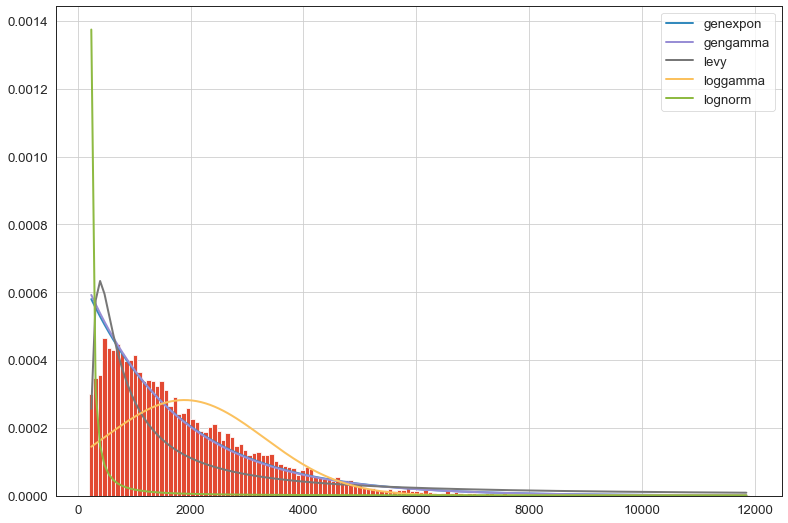

In [10]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
logistic,5.596967e-07,3864.239950,-575186.504483,inf
t,6.311817e-07,3839.861624,-572349.966808,inf
powerlaw,1.555498e-06,2928.617335,-551140.436748,inf
pareto,4.679563e-06,3226.086236,-525240.810861,inf


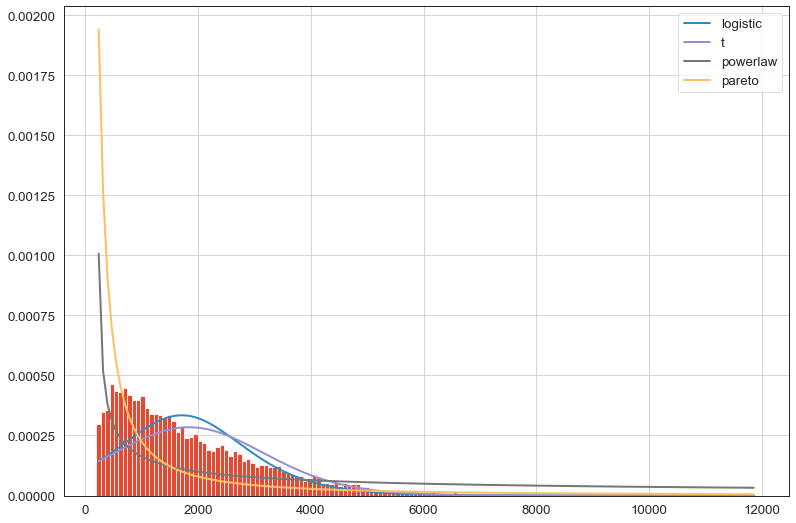

In [11]:
f = Fitter(distance,
           distributions= ['logistic','pareto','powerlaw','t'], bins=150)
f.fit()
f.summary()

### Best distributions chosen from the above analysis

,sumsquare_error,aic,bic,kl_div
beta,1.744889e-08,3541.883772,-656719.192044,inf
gamma,2.021235e-08,3382.085294,-653272.138874,inf
chi,7.913266e-08,3763.812475,-621178.113319,inf
genexpon,1.943171e-07,3279.025682,-600032.918156,inf
burr,3.042734e-07,3168.704834,-589498.026275,inf


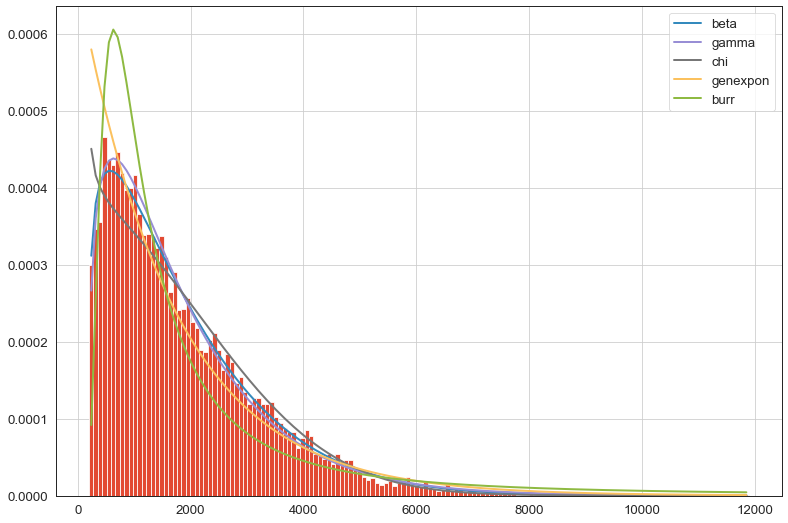

In [12]:
f = Fitter(distance,
           distributions= ['beta','burr','gamma','chi','genexpon', 't'],xmax=12000,bins=150)

f.fit()
f.summary()

## Gamma and Beta

,sumsquare_error,aic,bic,kl_div
beta,1.744889e-08,3541.883772,-656719.192044,inf
gamma,2.021235e-08,3382.085294,-653272.138874,inf


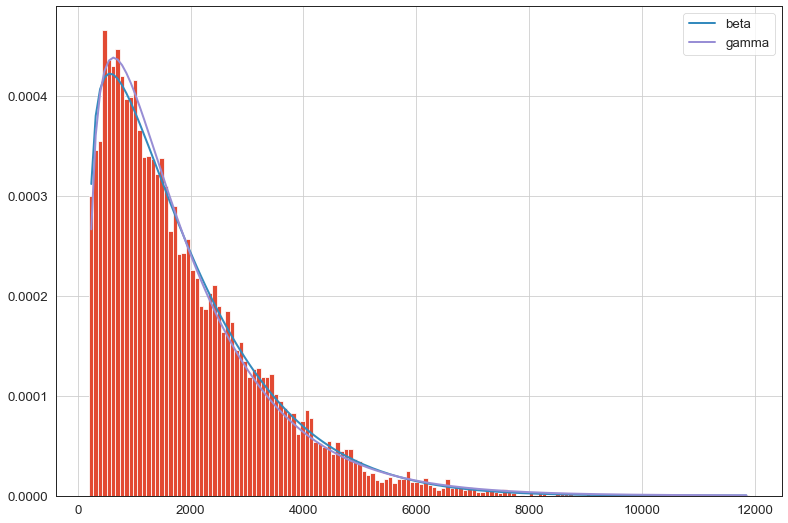

In [13]:
f = Fitter(distance,
           distributions= ['beta','gamma'],xmax=12000,bins=150)

f.fit()
f.summary()

In [14]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 1.2250485881926023,
  'b': 11.010672052737515,
  'loc': 199.2861407281533,
  'scale': 16846.440421045452}}

In [15]:
f.get_best(method = 'aic')

{'gamma': {'a': 1.346784537167104,
  'loc': 197.03109707497927,
  'scale': 1254.2441691618315}}

In [16]:
f.get_best(method = 'bic')

{'beta': {'a': 1.2250485881926023,
  'b': 11.010672052737515,
  'loc': 199.2861407281533,
  'scale': 16846.440421045452}}

## Rides Analysis

### Inital view of the data

<AxesSubplot:xlabel='ride_time', ylabel='Density'>

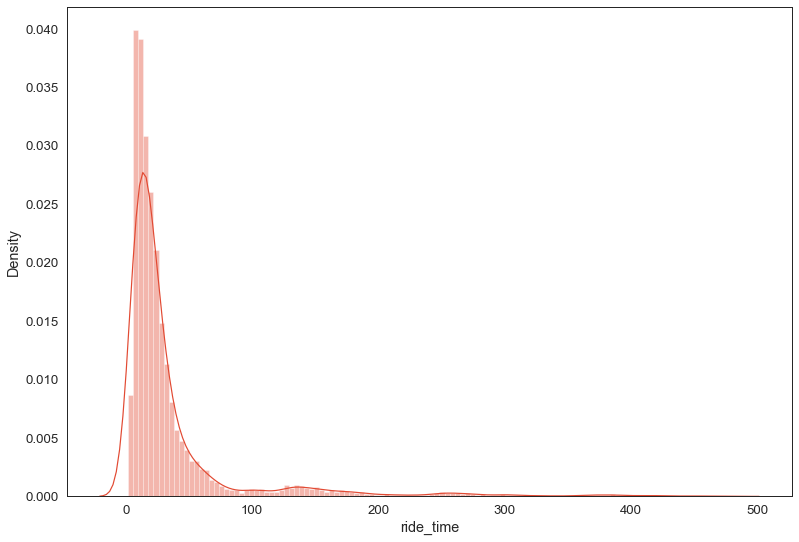

In [17]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 120)

In [18]:
rides = df["ride_time"].values

### Fitting continuous + common distributions

,sumsquare_error,aic,bic,kl_div
burr,0.000048,2065.069396,-470635.658935,inf
alpha,0.000049,2040.123018,-469831.742494,inf
beta,0.001308,2910.486391,-392770.289525,inf
bradford,0.003450,1606.341755,-369971.139028,inf
norm,0.003728,3460.267492,-368163.161775,inf


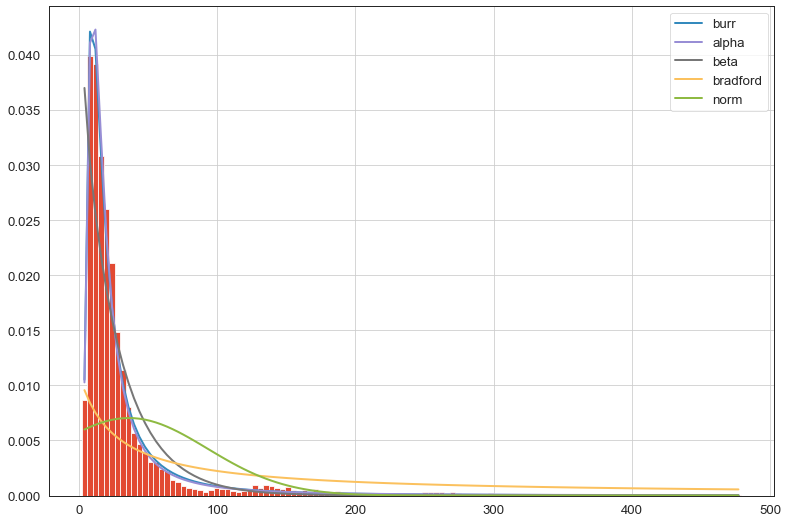

In [19]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 120)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
dgamma,0.000922,2656.809985,-401004.503665,inf
expon,0.001268,2528.373565,-393527.739872,inf
chi2,0.001434,2442.912176,-390618.786392,inf
chi,0.002418,2441.623537,-378332.438984,inf
cosine,0.005010,1700.772680,-361210.677925,inf


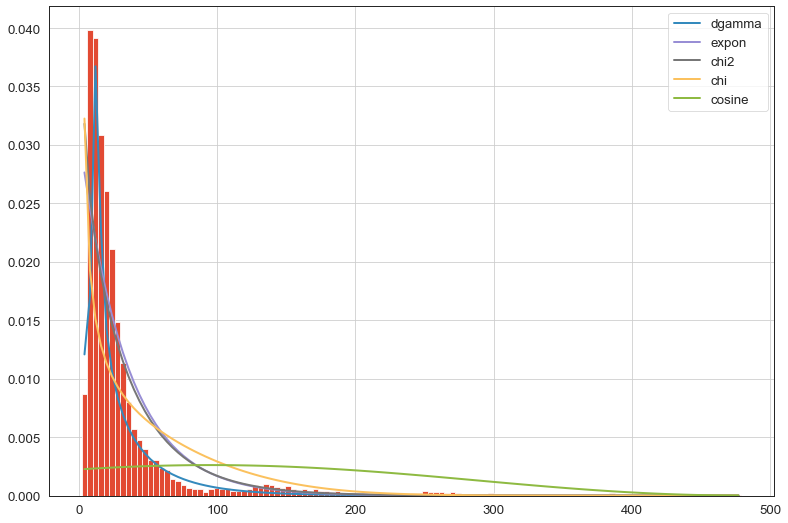

In [20]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 120)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
f,0.000052,2071.033858,-468518.958516,inf
fisk,0.000185,2146.215268,-438770.356819,inf
fatiguelife,0.000466,2212.955335,-417040.548693,inf
exponnorm,0.000650,2622.713916,-409217.089335,inf
gamma,0.001420,2442.390499,-390840.018479,inf


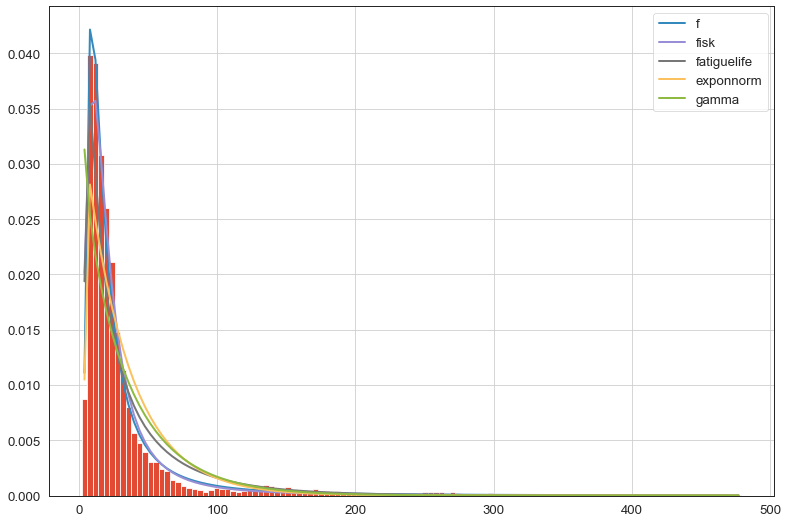

In [21]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 120)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,0.000282,2167.814974,-428820.245457,inf
gengamma,0.000649,2244.521081,-409257.756354,inf
genexpon,0.001268,2534.365611,-393497.449073,inf
levy,0.001287,1811.757911,-393168.800429,inf
loggamma,0.003828,3294.712569,-367531.180310,inf


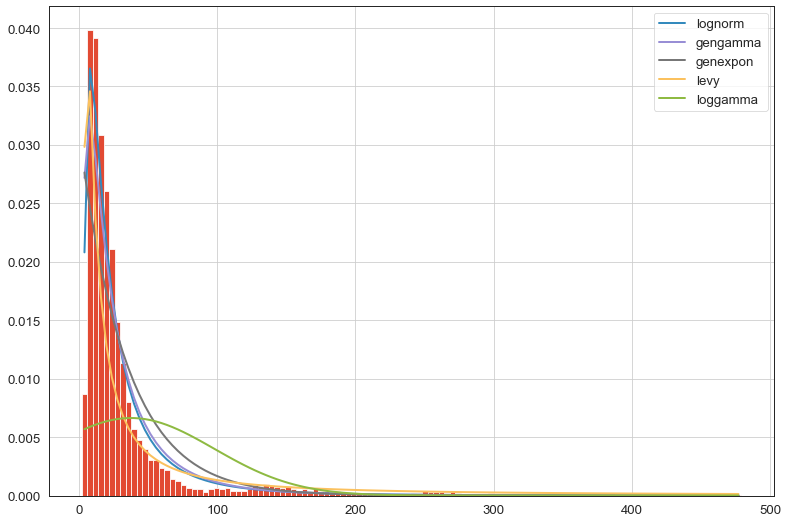

In [22]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 120)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
t,0.000613,2244.357552,-410614.218156,inf
pearson3,0.001442,2424.322915,-390478.710640,inf
logistic,0.002404,3435.751068,-378480.157632,inf
powerlaw,0.003427,1604.847099,-370129.681608,inf
pareto,0.006778,1918.293789,-354091.887362,inf


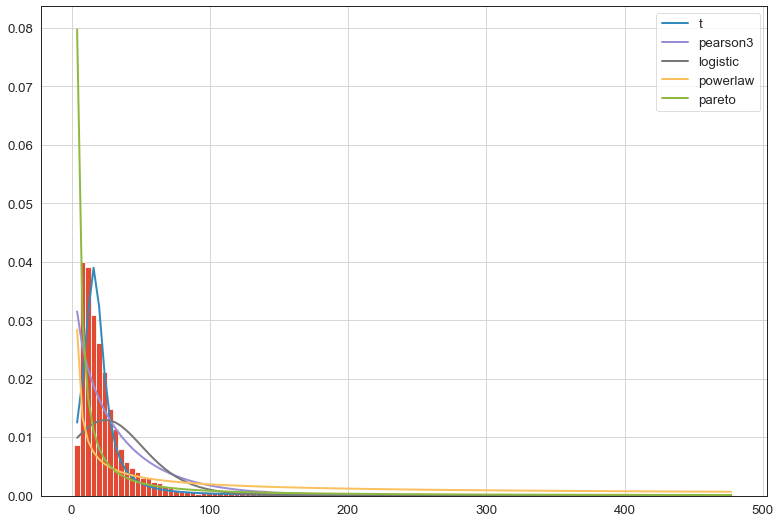

In [23]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 120)
f.fit()
f.summary()

### Best distributions chosen from the above analysis

,sumsquare_error,aic,bic,kl_div
burr,0.000048,2065.069396,-470635.658935,inf
alpha,0.000049,2040.123018,-469831.742494,inf
f,0.000052,2071.033858,-468518.958516,inf


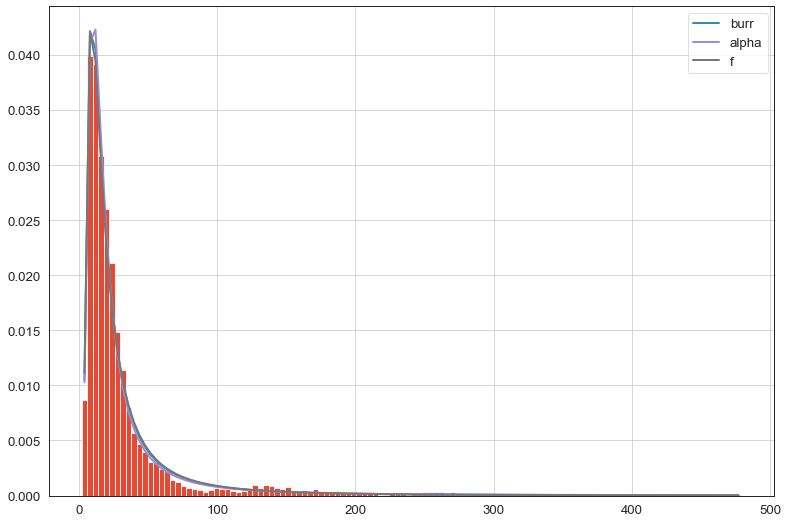

In [24]:
f = Fitter(rides,
           distributions= ['alpha','f', 'burr'], bins = 120)
f.fit()
f.summary()

In [25]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 1.4156502803914208,
  'd': 12.620564914444511,
  'loc': -0.04339911641732926,
  'scale': 2.3854442968526444}}

In [26]:
f.get_best(method = 'aic')

{'alpha': {'a': 1.3301361611181428,
  'loc': -4.752134342386251,
  'scale': 32.70076253147502}}

In [27]:
f.get_best(method = 'bic')

{'burr': {'c': 1.4156502803914208,
  'd': 12.620564914444511,
  'loc': -0.04339911641732926,
  'scale': 2.3854442968526444}}